# McCulloch Pitts Artificial Neuron
## 1.- Implementation of MPNeuron

The MPNeuron is the name for the implementation of the McCulloch Pitts Artificial Neuron

In [1]:
import numpy as np
"""
    En este caso tenemos es necesario definir el funcionamiento de la neurona de MP por que no 
    esta disponible en librerias como scikit o tensorflow
"""
class MPNeuron:
    
    def __init__(self):
        self.threshold = None
    
    def model(self,z):
        # input: [1,0,1,0] [x1,x2, ... , xn]
        # z sería la función de agregación
        # el return sería la evaluación de la función de activación en base a la agregación
        return (sum(z)>= self.threshold)
    
    def predict(self,X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)

In [2]:
# Instanciamos la neurona
mp_neuron = MPNeuron()

In [3]:
# Establecemos un threshold
mp_neuron.threshold = 3

In [4]:
# Evaluamos diferentes casos de uso
mp_neuron.predict([[1,0,0,0],[1,1,1,1],[1,1,1,0]])

array([False,  True,  True])

## 2.- Using MPNeuron in a real case
### 2.1 - Dataset
##### Spanish explanation:

Esta es una copia de los conjuntos de datos de UCI ML Breast Cancer Wisconsin (Diagnóstico). https://goo.gl/U2Uwz2

Las características de entrada se calculan a partir de una imagen digitalizada de un aspirado de aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.

El plano de separación descrito anteriormente se obtuvo utilizando el método de árbol de múltiples superficies (MSM-T) [K. P. Bennett, "Construcción de un árbol de decisión mediante programación lineal". Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], un método de clasificación que utiliza la programación lineal para construir un árbol de decisión. Los rasgos relevantes se seleccionaron mediante una búsqueda exhaustiva en el espacio de 1-4 rasgos y 1-3 planos de separación.

El programa lineal real utilizado para obtener el plano de separación en el espacio tridimensional es el que se describe en: [K. P. Bennett y O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

Esta base de datos también está disponible a través del servidor ftp UW CS:

ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

##### English explanation:

This is a copy of the UCI ML Breast Cancer Wisconsin (Diagnosis) data sets. https://goo.gl/U2Uwz2

Input characteristics are calculated from a digitized fine needle aspirate (FNA) image of a breast mass. They describe the characteristics of the cell nuclei present in the image.

The separation plane described above was obtained using the multi-surface tree method (MSM-T) [K. P. Bennett, "Building a Decision Tree Using Linear Programming". Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method that uses linear programming to construct a decision tree. Relevant features were selected by an exhaustive search in the space of 1-4 features and 1-3 planes of separation.

The real linear program used to obtain the separation plane in three-dimensional space is the one described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu cd math-prog / cpo-dataset / machine-learn / WDBC /

### Referencies

* W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.
* O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and prognosis via linear programming. Operations Research, 43(4), pages 570-577, July-August 1995.
* W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 163-171.

### 2.2. Reading datasets

In [5]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

X = breast_cancer.data #Almacenamos en X los datos  
Y = breast_cancer.target #Almacenamos la etiqueta (que dice si una masa mamaria es benigna o maligna)

In [6]:
dir(breast_cancer)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

### 2.3.- Dataset visualization

In [8]:
import pandas as pd

df = pd.DataFrame(X, columns=breast_cancer.feature_names) #Damos formato a la variable X en formato dataFrame para facilitar su manipulación
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

### 2.4.- Dataset division

In [10]:
from sklearn.model_selection import train_test_split
# Tenemos que dividir el conjunto de datos en subconjuntos.
"""
    Esta función va a recibir el df, las características de salida (Y) y el stratify intenta mantener las proporciones entre los datos benignos y malignos
"""
X_train, X_test, y_train, y_test = train_test_split(df, Y, stratify=Y)

print("Tamaño del conjunto de datos de entrenamiento: ", len(X_train))
print("Tamaño del conjunto de datos de pruebas: ", len(X_test))

Tamaño del conjunto de datos de entrenamiento:  426
Tamaño del conjunto de datos de pruebas:  143


### 2.5 - Implementation of advanced MPNeuron



In [11]:
import numpy as np
from sklearn.metrics import accuracy_score

class MPNeuron:
    
    def __init__(self):
        self.threshold = None
        
    def model(self, x):
        return (sum(x) >= self.threshold)
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    """
        Este metodo se encarga de buscar el valor del threshold que mejor se adapta a nuestro conjunto de datos
        para ello recibimos X (características de entrada) y Y (características de salida) y en base a esos valores saber si es maligno o benigno
        recorremos todos los valores de X (30 columnas considerando nuestro threshold entre 1 y 30) y comprobaremos para Y que threshold se comporta mejor
    """
    def fit(self, X, Y):
        accuracy = {}
        # Seleccionamos un threshold entre el # de características de entrada
        for th in range(X.shape[1] + 1):
            self.threshold = th
            Y_pred = self.predict(X)
            accuracy[th] = accuracy_score(Y_pred, Y)
        # Seleccionamos el threshold que mejores resultados proporciona
        self.threshold = max(accuracy, key=accuracy.get)

Seguimos teniendo un problema debido a que en nuestro conjunto de datos las características de entrada reciben valores continuos, sin embargo, nuestra MPNeuron solo procesa características de entrada con valor binario

[0, 0, 1, 1, 1, 0, 0]
Categories (2, int64): [0 < 1]


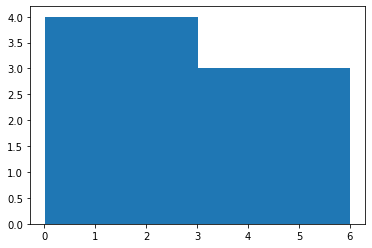

In [12]:
# Para transformar un valor a binario
import matplotlib.pyplot as plt
# bins indica el rango de separación (0 y 1)
print(pd.cut([0.04, 2, 4, 5, 6, 0.02, 0.6], bins=2, labels=[0, 1]))

plt.hist([0.04, 2, 4, 5, 6, 0.02, 0.6], bins=2) 
plt.show()

In [13]:
# Transformamos las caracteríticas de entrada a un valor binario
X_train_bin = X_train.apply(pd.cut, bins=2, labels=[1, 0])
X_test_bin = X_test.apply(pd.cut, bins=2, labels=[1, 0])

X_train_bin

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
552,1,0,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
39,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,0,1,1
58,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
285,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
432,0,1,0,1,0,1,1,0,1,1,...,0,1,1,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
327,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
249,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
187,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [14]:
# Instanciamos el modelo MPNeuron
mp_neuron = MPNeuron()

# Encontramos el threshold óptimo
mp_neuron.fit(X_train_bin.to_numpy(), y_train)

In [15]:
# Threshold óptimo seleccionado
mp_neuron.threshold

28

In [16]:
# Realizamos predicciones para ejemplos nuevos que no se encuentran en el conjunto de datos de entrenamiento
Y_pred = mp_neuron.predict(X_test_bin.to_numpy())
Y_pred

array([False, False, False,  True, False,  True, False,  True, False,
        True, False,  True, False, False,  True, False, False,  True,
        True,  True, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
        True,  True, False, False, False,  True, False, False, False,
        True, False,  True, False,  True,  True,  True, False, False,
        True, False,  True, False,  True, False, False,  True,  True,
       False,  True, False,  True, False,  True, False,  True,  True,
       False,  True,  True,  True,  True, False, False,  True, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
       False, False, False,  True, False,  True,  True, False,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
        True,  True, False, False,  True,  True, False,  True, False,
        True,  True,  True, False,  True,  True, False,  True, False,
        True,  True,

In [17]:
# Calculamos la exactitud de nuestra predicción
accuracy_score(y_test, Y_pred)

0.8251748251748252

In [18]:
# Calculamos la matriz de confusión
from sklearn.metrics import confusion_matrix
"""
   [ [positivos, falsos positivos], [falsos negativos, negativos] ]
"""
confusion_matrix(y_test, Y_pred)

array([[49,  4],
       [21, 69]])